In [14]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [15]:
#load data
data = pd.read_csv("..\\..\\Data\\Month\\sand500_MinuteToMonth.csv")

In [16]:
data.head()

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol
0,2010-01-31 23:59:59.999999999,2010-01,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0
1,2010-02-28 23:59:59.999999999,2010-02,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0
2,2010-03-31 23:59:59.999999999,2010-03,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0
3,2010-04-30 23:59:59.999999999,2010-04,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0
4,2010-05-31 23:59:59.999999999,2010-05,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0


In [17]:
#transform data
import datetime
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Close = data.Close.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)

In [18]:
special_data = pd.DataFrame(data)

In [19]:
#change indexes
special_data.set_index('Date', inplace=True)

In [20]:
data.head()

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
0,2010-01-31 23:59:59.999999999,2010-01-01,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01
1,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02
2,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03
3,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04
4,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05


In [21]:
special_data.head(10)

,LastDayOfMonth,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
Date,,,,,,,,,
2010-01-01,2010-01-31 23:59:59.999999999,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01
2010-02-01,2010-02-28 23:59:59.999999999,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02
2010-03-01,2010-03-31 23:59:59.999999999,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03
2010-04-01,2010-04-30 23:59:59.999999999,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04
2010-05-01,2010-05-31 23:59:59.999999999,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05
2010-06-01,2010-06-30 23:59:59.999999999,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06
2010-07-01,2010-07-31 23:59:59.999999999,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07
2010-08-01,2010-08-31 23:59:59.999999999,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08
2010-09-01,2010-09-30 23:59:59.999999999,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09


In [22]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

,LastDayOfMonth,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index,new_date
Date,,,,,,,,,,,
2010-01-01,2010-01-31 23:59:59.999999999,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01,1073.82,1073.82
2010-02-01,2010-02-28 23:59:59.999999999,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1104.48,1104.48
2010-03-01,2010-03-31 23:59:59.999999999,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1169.37,1169.37
2010-04-01,2010-04-30 23:59:59.999999999,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1188.06,1188.06
2010-05-01,2010-05-31 23:59:59.999999999,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1089.41,1089.41


In [23]:
special_data.head(20)

,LastDayOfMonth,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index,new_date
Date,,,,,,,,,,,
2010-01-01,2010-01-31 23:59:59.999999999,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01,1073.82,1073.82
2010-02-01,2010-02-28 23:59:59.999999999,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1104.48,1104.48
2010-03-01,2010-03-31 23:59:59.999999999,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1169.37,1169.37
2010-04-01,2010-04-30 23:59:59.999999999,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1188.06,1188.06
2010-05-01,2010-05-31 23:59:59.999999999,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1089.41,1089.41
2010-06-01,2010-06-30 23:59:59.999999999,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06,1031.08,1031.08
2010-07-01,2010-07-31 23:59:59.999999999,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07,1101.60,1101.60
2010-08-01,2010-08-31 23:59:59.999999999,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08,1048.46,1048.46
2010-09-01,2010-09-30 23:59:59.999999999,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09,1142.10,1142.10


In [24]:
print(special_data.index)

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [25]:
special_data.head(20)

,LastDayOfMonth,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index,new_date
Date,,,,,,,,,,,
2010-01-01,2010-01-31 23:59:59.999999999,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01,1073.82,1073.82
2010-02-01,2010-02-28 23:59:59.999999999,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1104.48,1104.48
2010-03-01,2010-03-31 23:59:59.999999999,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1169.37,1169.37
2010-04-01,2010-04-30 23:59:59.999999999,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1188.06,1188.06
2010-05-01,2010-05-31 23:59:59.999999999,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1089.41,1089.41
2010-06-01,2010-06-30 23:59:59.999999999,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06,1031.08,1031.08
2010-07-01,2010-07-31 23:59:59.999999999,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07,1101.60,1101.60
2010-08-01,2010-08-31 23:59:59.999999999,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08,1048.46,1048.46
2010-09-01,2010-09-30 23:59:59.999999999,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09,1142.10,1142.10


In [26]:
print(special_data.index)

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [27]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

Confidence intervals not found for arima1. To turn on confidence intervals for future evaluated models, call the eval_cis() method.


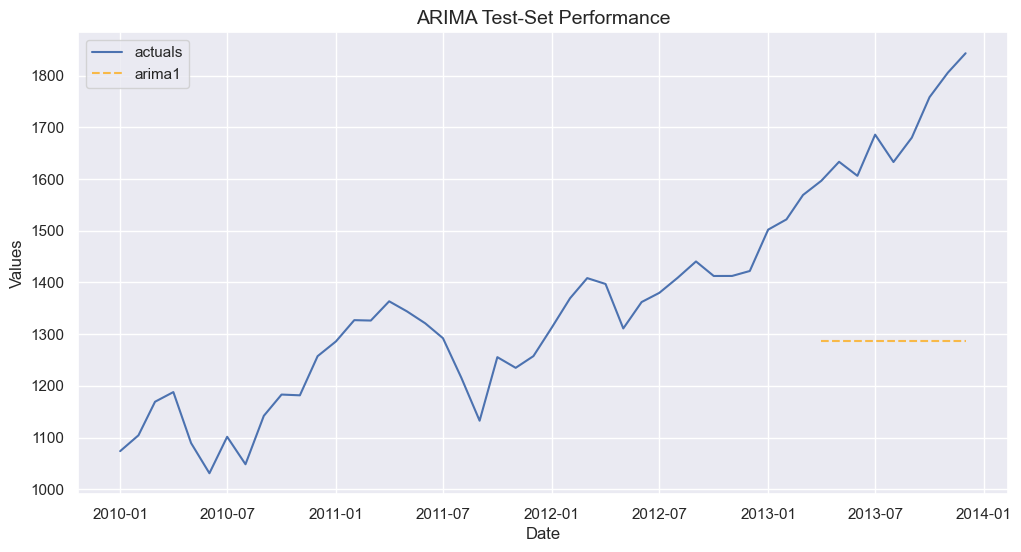

In [28]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

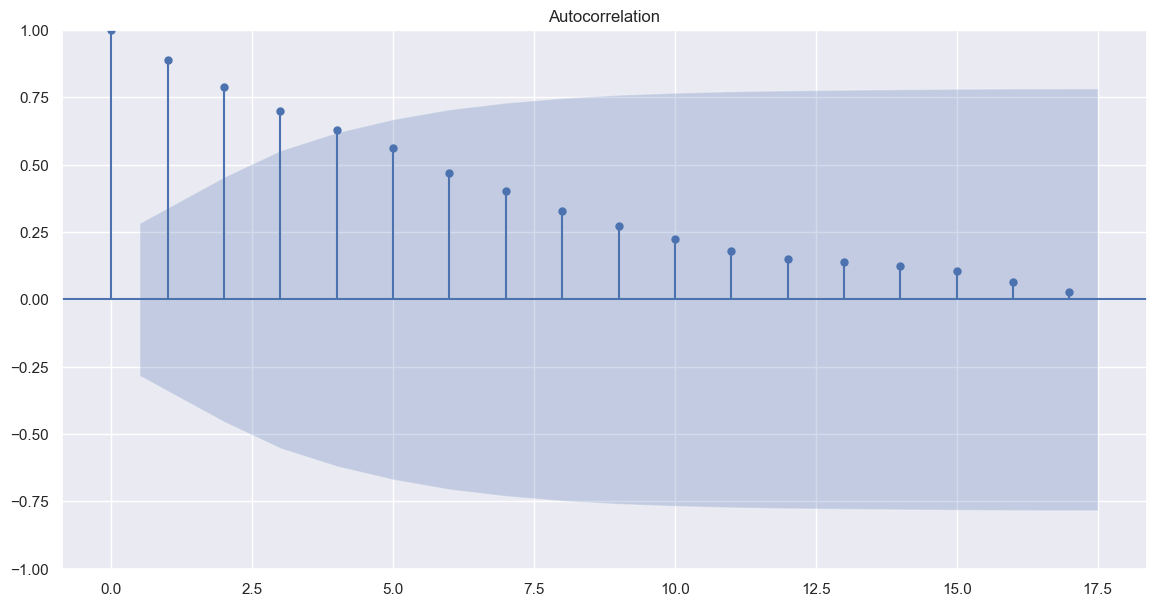

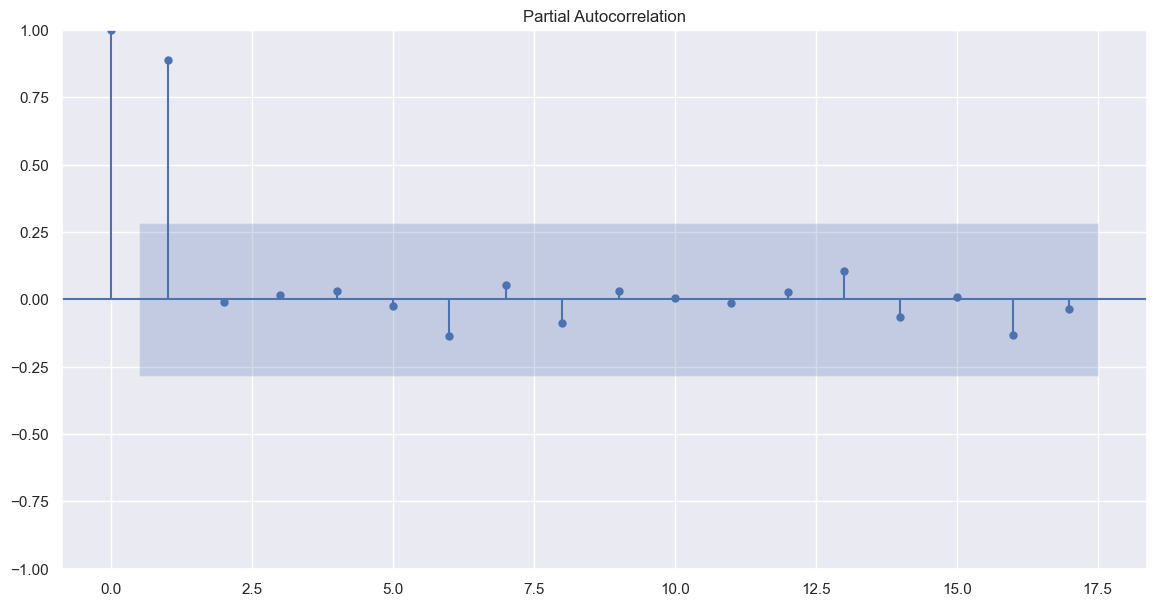

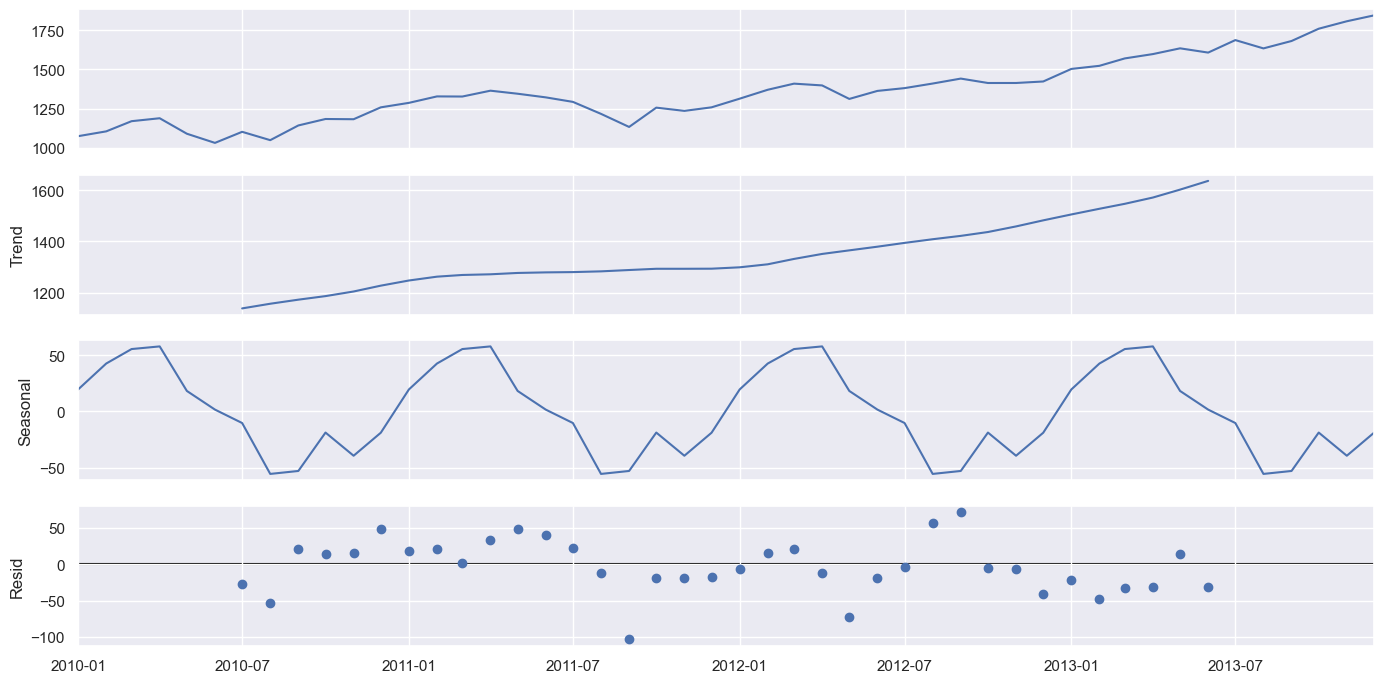

0.23945906731454697
0.9743898952697848


In [29]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

Confidence intervals not found for arima2. To turn on confidence intervals for future evaluated models, call the eval_cis() method.


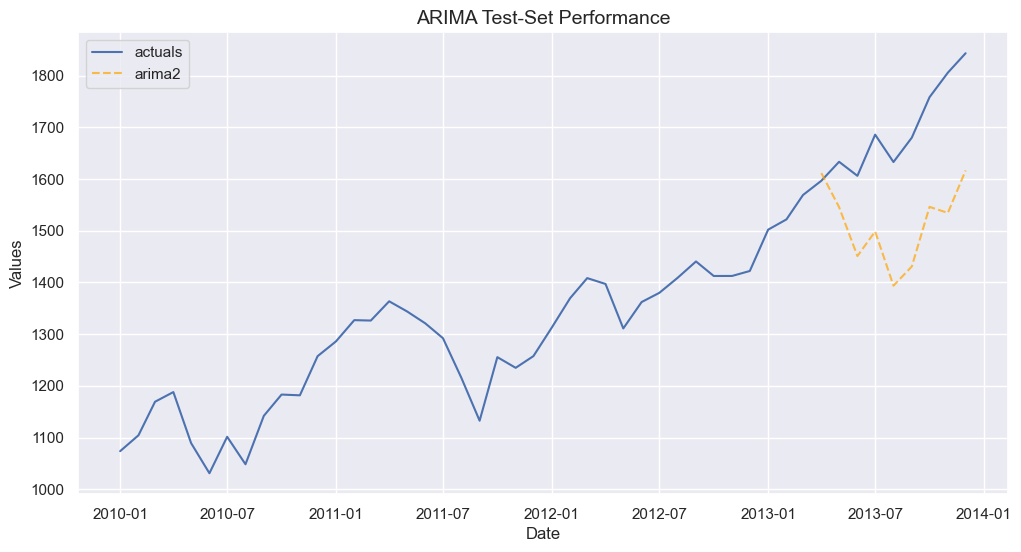

Confidence intervals not found for arima2. To turn on confidence intervals for future evaluated models, call the eval_cis() method.


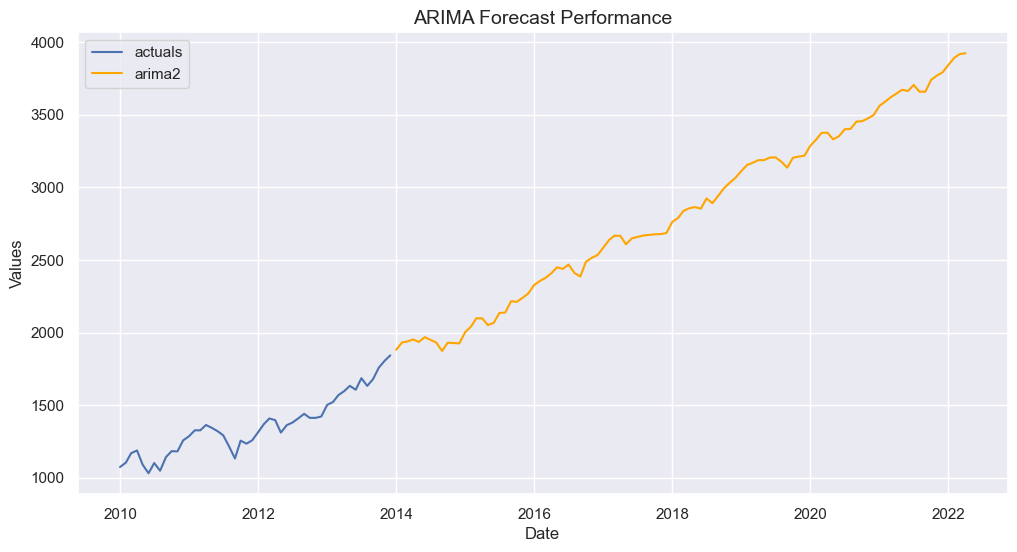

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                   48
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -189.356
Date:                          Mon, 27 Nov 2023   AIC                            392.713
Time:                                  21:30:46   BIC                            403.600
Sample:                                       0   HQIC                           396.471
                                           - 48                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0961    112.696     -0.010      0.992    -221.977     219.785
ar.L2         -0.0980     10.968     -0.009      0.993     -21.595      21.399
ma.L1          0.9981    113.473      0.009      0.993    -221.405     223.401
ar.S.L12      -1.4226      0.250     -5.691      0.000      -1.913      -0.933
ar.S.L24      -0.8624      0.105     -8.241      0.000      -1.068      -0.657
ma.S.L12       0.9946      1.043      0.953      0.340      -1.050       3.039
sigma2      1102.0531      0.001   1.35e+06      0.000    1102.052    1102.055
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.98   Prob(JB):                         0.61
Heteroskedasticity (H):               0.85   Skew:                            -0.24
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+26. Standard errors may be unstable.
"""

In [30]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [31]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [32]:
adf_test(special_data['Close'])

1. ADF :  0.23945906731454697
2. P-Value :  0.9743898952697848
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


In [33]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings = True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -250.740
Date:                Mon, 27 Nov 2023   AIC                            505.479
Time:                        21:31:27   BIC                            509.179
Sample:                    01-01-2010   HQIC                           506.871
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.3726      7.810      2.096      0.036       1.065      31.680
sigma2      2519.6853    603.360      4.176      0.000    1337.122    3702.249
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.73   Prob(JB):                         0.41
Heteroskedasticity (H):               0.59   Skew:                            -0.45
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
data_len = len(special_data)

In [35]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [36]:
train_data = special_data.iloc[:int(train_len)]

In [37]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [30]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Close'],order=(1,1,5))
model = model.fit()
model.summary()

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   33
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -172.287
Date:                Mon, 27 Nov 2023   AIC                            358.573
Time:                        20:51:58   BIC                            368.833
Sample:                             0   HQIC                           361.974
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7789      0.227     -3.430      0.001      -1.224      -0.334
ma.L1          0.9924      0.472      2.104      0.035       0.068       1.917
ma.L2          0.0443      0.305      0.145      0.885      -0.553       0.642
ma.L3         -0.0818      0.288     -0.285      0.776      -0.645       0.482
ma.L4         -0.1629      0.325     -0.502      0.616      -0.799       0.473
ma.L5         -0.3972      0.314     -1.264      0.206      -1.013       0.219
sigma2      2558.8357   1398.209      1.830      0.067    -181.604    5299.276
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.42   Prob(JB):                         0.46
Heteroskedasticity (H):               0.53   Skew:                            -0.17
Prob(H) (two-sided):                  0.31   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start= test_data.index[0]
end= test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(range(0, test_len - 1), test_data['Close'])
plt.plot(range(0, test_len - 1), pred)
plt.xlabel('Index')
plt.ylabel('Price')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [32]:
test_data.index[0]

1412.58

In [33]:
start

1412.58

In [34]:
end

1843.33

In [35]:
test_data

,LastDayOfMonth,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
new_index,,,,,,,,,
1412.58,2012-10-31 23:59:59.999999999,SANDP-500,1,1412.23,1412.58,1412.20,1412.58,0,2012-10
1412.65,2012-11-30 23:59:59.999999999,SANDP-500,1,1412.88,1412.88,1412.65,1412.65,0,2012-11
1422.23,2012-12-31 23:59:59.999999999,SANDP-500,1,1421.61,1422.23,1421.61,1422.23,0,2012-12
1502.17,2013-01-31 23:59:59.999999999,SANDP-500,1,1502.27,1502.30,1502.17,1502.17,0,2013-01
1522.01,2013-02-28 23:59:59.999999999,SANDP-500,1,1521.95,1522.01,1521.95,1522.01,0,2013-02
1569.19,2013-03-31 23:59:59.999999999,SANDP-500,1,1569.19,1569.19,1569.19,1569.19,0,2013-03
1596.73,2013-04-30 23:59:59.999999999,SANDP-500,1,1596.16,1596.73,1596.16,1596.73,0,2013-04
1633.41,2013-05-31 23:59:59.999999999,SANDP-500,1,1634.65,1634.65,1633.41,1633.41,0,2013-05
1606.28,2013-06-30 23:59:59.999999999,SANDP-500,1,1606.28,1606.28,1606.28,1606.28,0,2013-06


In [36]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=505.479, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=509.369, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=509.373, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=508.231, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=507.463, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=507.468, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=509.315, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=507.373, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=507.376, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=509.369, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 0.690 seconds


ValueError: No frequency information was provided with date index and no frequency could be inferred.

In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4035.755
Date:                Sun, 13 Nov 2022   AIC                           8077.510
Time:                        12:08:16   BIC                           8092.248
Sample:                             0   HQIC                          8083.110
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8444      0.066    -12.706      0.000      -0.975      -0.714
ma.L1          0.7846      0.078     10.119      0.000       0.633       0.937
sigma2       180.0879      5.647     31.892      0.000     169.021     191.155
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               284.21
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.40
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

The last CV fold will not be considered when choosing hyperparemeters for the arima model, as all parameters failed to return a metric. This most frequently happens when default CV parameters were used with an RNN model.
Mean of empty slice.
invalid value encountered in divide
None of the keyword/value combos stored in the grid could be evaluated for the arima model. See the errors in warnings.log.


ValueError: No frequency information was provided with date index and no frequency could be inferred.

In [39]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [40]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.009163,0.037620
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 0, 12)}",0.010164,0.053786
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.008407,0.068865
3,arima1,{},0.117585,0.237339
